In [11]:
import pandas as pd
df = pd.read_csv("../data/df_baseline.csv")

## Load Data

In [12]:
print(df.shape)
df.head()

(1091, 18)


,label,artist,album,genre,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,rating_AOTY,rating_meta,rating_pitch,twitter,instagram,facebook,spotify,soundcloud,youtube
0,0,Flash Bang Grenada,10 Haters,hiphop,0,0,0,0,0,NaN,NaN,NaN,0,0,0,346,0,0
1,0,Aggro Santos,AggroSantos.com,hiphop,3,0,0,0,0,NaN,NaN,NaN,63771,27415,596562,4675,585,7975
2,0,AKA,Altar Ego,hiphop,4,0,0,1,2,NaN,NaN,NaN,38958,0,0,22298,0,3643764
3,0,Shlohmo,Bad Vibes,hiphop,0,0,0,0,67,NaN,NaN,7.8,91790,59340,209063,141268,283539,0
4,0,Glasses Malone,Beach Cruiser,hiphop,4,0,0,0,4,NaN,NaN,NaN,68417,48745,93741,16402,0,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1091 entries, 0 to 1090
Data columns (total 18 columns):
label             1091 non-null int64
artist            1091 non-null object
album             1091 non-null object
genre             1091 non-null object
single_count      1091 non-null int64
freq_billboard    1091 non-null int64
freq_genius       1091 non-null int64
freq_theSource    1091 non-null int64
freq_xxl          1091 non-null int64
rating_AOTY       61 non-null float64
rating_meta       324 non-null float64
rating_pitch      220 non-null float64
twitter           1091 non-null int64
instagram         1091 non-null int64
facebook          1091 non-null int64
spotify           1091 non-null int64
soundcloud        1091 non-null int64
youtube           1091 non-null int64
dtypes: float64(3), int64(12), object(3)
memory usage: 153.5+ KB


**Note**
- 온라인매체 기사의 양, 평론가 평점은 Null Value가 있기 때문에, 당장 Decision Tree를 통해 학습을 시킬 수 없어, Feature에서 제외를 한다.

## Data Preparation for Modeling

#### 장르 `hiphop`, `R&B`, `Soul`, `Funk`, `Pop`

In [14]:
df = pd.get_dummies(df, columns=['genre'])

In [15]:
df.columns

Index(['label', 'artist', 'album', 'single_count', 'freq_billboard',
       'freq_genius', 'freq_theSource', 'freq_xxl', 'rating_AOTY',
       'rating_meta', 'rating_pitch', 'twitter', 'instagram', 'facebook',
       'spotify', 'soundcloud', 'youtube', 'genre_funk', 'genre_hiphop',
       'genre_pop', 'genre_rnb', 'genre_soul'],
      dtype='object')

#### Split train & test data 

In [16]:
feature_names = ['single_count', 'freq_billboard',
                 'freq_genius', 'freq_theSource', 'freq_xxl',
                 'twitter', 'instagram', 'facebook',
                 'spotify', 'soundcloud', 'youtube',
                 'genre_funk', 'genre_hiphop', 'genre_pop', 'genre_rnb', 'genre_soul']
dfX = df[feature_names].copy()
dfy = df['label'].copy()

In [17]:
dfX.tail()

,single_count,freq_billboard,freq_genius,freq_theSource,freq_xxl,twitter,instagram,facebook,spotify,soundcloud,youtube,genre_funk,genre_hiphop,genre_pop,genre_rnb,genre_soul
1086,0,0,0,200,9,3708,7855,10703,15130,1043,14066,0,0,1,0,0
1087,3,2,0,0,9,600,286554,355355,329507,21954,1728617,0,0,1,0,0
1088,2,0,0,0,0,1913,23837,9187,16544,756,743,0,0,1,0,0
1089,6,2,0,0,0,11571,27192,27615,60983,6295,43228,0,0,1,0,0
1090,4,1,0,0,213,19974,27428,60138,37009,2341,22642,0,0,1,0,0


In [18]:
dfy.tail()

1086    0
1087    0
1088    0
1089    0
1090    0
Name: label, dtype: int64

# KNN

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model = KNeighborsClassifier(n_neighbors=10).fit(X_train, y_train)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
confusion_matrix(y_test, model.predict(X_test))

array([[209,  13],
       [ 32,  19]])

In [49]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test, model.predict(X_test)))

             precision    recall  f1-score   support

          0       0.87      0.94      0.90       222
          1       0.59      0.37      0.46        51

avg / total       0.82      0.84      0.82       273



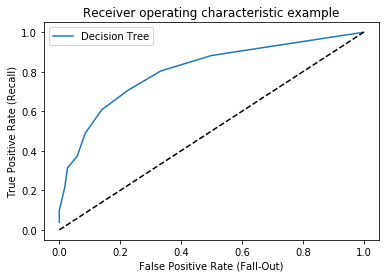

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="Decision Tree")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.show()

In [44]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.7476152623211447